In [1]:
%pylab inline
import geopandas as gpd
import networkx as nx


Populating the interactive namespace from numpy and matplotlib


In [2]:
cline_fn = "../../tests/testdata/CoastLine.shp"
lnj_fn = "../../tests/testdata/LineJoinMulti.shp"
cline = gpd.read_file(lnj_fn)
len(cline)

11

In [3]:
import pyriv
(cline.geom_type == "MultiLineString").any(), (pyriv.common.explode(cline).geom_type == "MultiLineString").any()

(True, False)

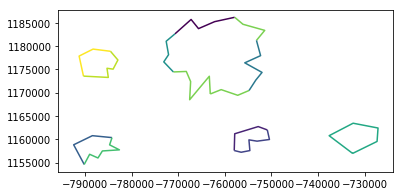

In [4]:
import random
random.seed(2)
cline['id'] = random.sample(xrange(0, len(cline)), len(cline))
cline.plot(column='id')

In [5]:
from shapely.geometry import Polygon
from tempfile import mkdtemp
import os

class CoastLine(nx.Graph):
    def __init__(self, *args, **kwargs):
        """
        Build a CoastLine object.

        Parameters
        ----------

        Returns
        -------
          A CoastLine object
        """
        self = super(CoastLine, self).__init__(*args, **kwargs)
        
    @classmethod
    def read_shp(cls, shp_fn):
        """
        Construct a CoastLine object from a shapefile.
        """
        gdf = gpd.read_file(shp_fn)
        if (gdf.geom_type == 'MultiLineString').any():
            tmpdir = mkdtemp()
            shp_fn = os.path.join(tmpdir, "single_part.shp")
            sp_shp = pyriv.common.explode(gdf).to_file(shp_fn)
        dig = nx.read_shp(shp_fn, simplify=False)
        return cls(dig)
    
    def connected_subgraphs(self):
        """
        Get the connected component subgraphs. See the NetworkX
        documentation for `connected_component_subgraphs` for more
        information.
        """
        return nx.connected_component_subgraphs(self)
    
    def rings(self):
        """
        Return a list of rings. Each ring is a list of nodes. Each
        node is a coordinate pair.
        """
        rings = [list(nx.dfs_preorder_nodes(sg)) for sg in self.connected_subgraphs()]
        return rings
    
    def polygons(self):
        """
        Return a list of `shapely.Polygon`s representing each ring.
        """
        return [Polygon(r) for r in self.rings()]
    
    def poly_geodataframe(self):
        """
        Return a `geopandas.GeoDataFrame` of polygons.
        """
        return gpd.GeoDataFrame({'geometry': self.polygons()})

In [6]:
# G = nx.read_shp(lnj_fn).to_undirected()
G = CoastLine.read_shp(lnj_fn)
polygdf = G.poly_geodataframe()

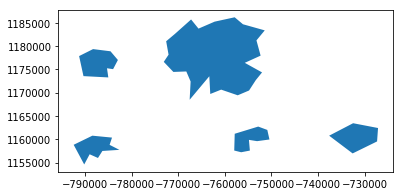

In [7]:
polygdf.plot()

## Stackexchage Example

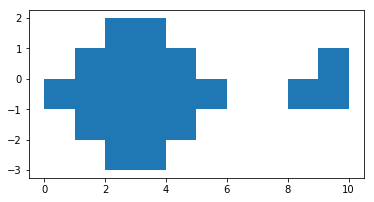

In [8]:
edge_list = [
    ((5, -1), (5, -2)),
    ((6, -1), (5, -1)),
    ((1, 0), (1, 1)),
    ((4, -3), (2, -3)),
    ((2, -2), (1, -2)),
    ((9, 0), (9, 1)),
    ((2, 1), (2, 2)),
    ((0, -1), (0, 0)),
    ((5, 0), (6, 0)),
    ((2, -3), (2, -2)),
    ((6, 0), (6, -1)),
    ((4, 1), (5, 1)),
    ((10, -1), (8, -1)),
    ((10, 1), (10, -1)),
    ((2, 2), (4, 2)),
    ((5, 1), (5, 0)),
    ((8, -1), (8, 0)),
    ((9, 1), (10, 1)),
    ((8, 0), (9, 0)),
    ((1, -2), (1, -1)),
    ((1, 1), (2, 1)),
    ((5, -2), (4, -2)),
    ((4, 2), (4, 1)),
    ((4, -2), (4, -3)),
    ((1, -1), (0, -1)),
    ((0, 0), (1, 0)) ]

eG = CoastLine()

for e in edge_list:
    eG.add_edge(*e)

eG.poly_geodataframe().plot()

## Check the pyriv Version

In [9]:
import pyriv

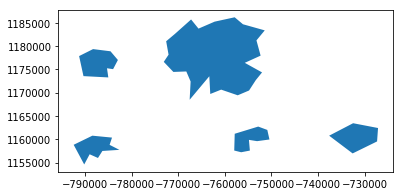

In [10]:
clg = pyriv.CoastLineGraph.read_shp(lnj_fn)
clg.poly_geodataframe().plot()